# <center> Aspectos Basicos para Visualização de Dados </center>

## Basic ToolBox - Visualização de Dados II

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

# ``pairplot`` seaborn

* Grafico para extrair os relacionamentos de pares das variaveis em um conjunto de dados.

In [17]:
peng = sns.load_dataset('penguins')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


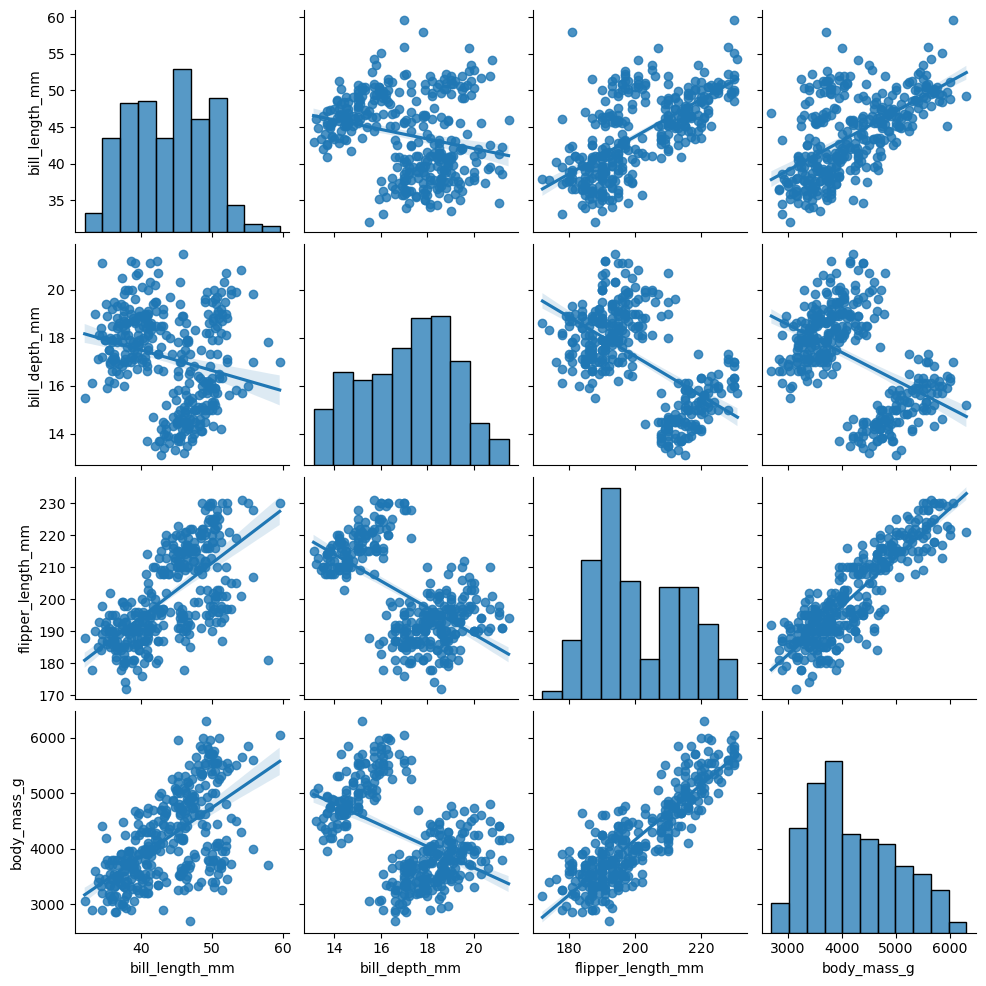

In [18]:
sns.pairplot(peng, dropna=True, kind='reg')
plt.show();

In [19]:
df = pd.read_csv('Sample_DH_Vendas.csv', sep=';')
df.head()

,Ano,Vendas
0,2000,2000000
1,2001,5000000
2,2002,7000000
3,2003,10000000
4,2004,15000000


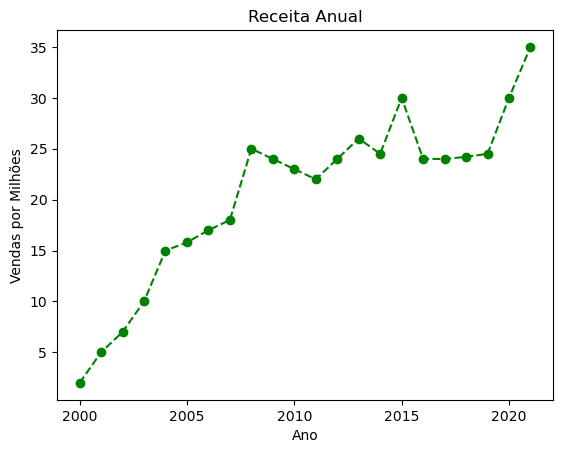

In [20]:
plt.plot(df.Ano, df.Vendas/1000000, '--go')
plt.title('Receita Anual')
plt.xlabel('Ano')
plt.ylabel('Vendas por Milhões')
plt.show()

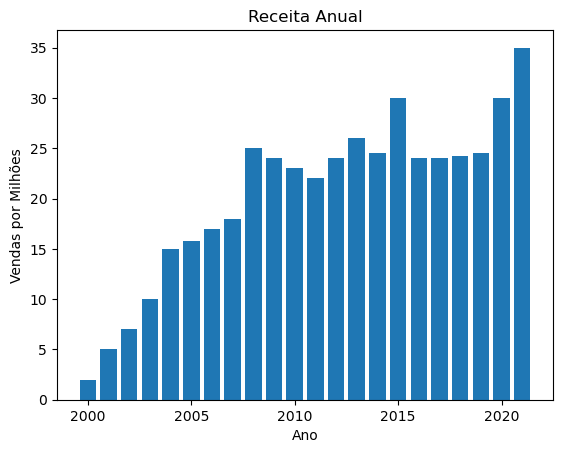

In [21]:
plt.bar(df.Ano, df.Vendas/1000000)
plt.title('Receita Anual')
plt.xlabel('Ano')
plt.ylabel('Vendas por Milhões')
plt.show()

## ``pie`` matplotlib

* Gerar um grafico de pizza

,Produto,Vendas
0,Celular,12000000.0
1,TV,5000000.0
2,Geladeira,5200000.0
3,Sofá,3700000.0
4,Escrivaniha,800000.0
5,Notebook,8300000.0


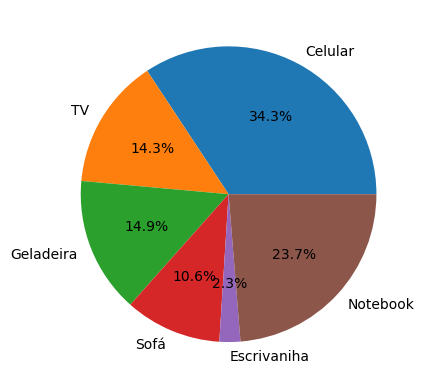

In [35]:
df1 = pd.read_csv('Sample_DH_Produtos.csv', encoding="iso-8859-1", sep=';')
display(df1.head(8))

plt.pie(df1.Vendas, labels = df1.Produto, autopct = '%1.1f%%')
plt.show()

## <center>  Exemplos Aplicados </center>

,id_user,Idade,cidade_residencia,estado_residencia,qtd_anos_ativo,nm_cluster,qtd_acessos,flg_pgto_em_dia,uso_WhatsApp,uso_Facebook,uso_Instagram,uso_LinkedIn,uso_TikTok
0,1,25,SAO PAULO,SP,1,VIDA SIMPLES,3,Em dia,4 - No Navigation,4 - No Navigation,4 - No Navigation,4 - No Navigation,4 - No Navigation
1,2,41,PEREIRO,CE,2,CARENTES,3,Em dia,4 - No Navigation,4 - No Navigation,4 - No Navigation,4 - No Navigation,4 - No Navigation
2,3,35,FAROL,PR,2,VIDA SIMPLES,3,Em dia,4 - No Navigation,4 - No Navigation,4 - No Navigation,4 - No Navigation,4 - No Navigation


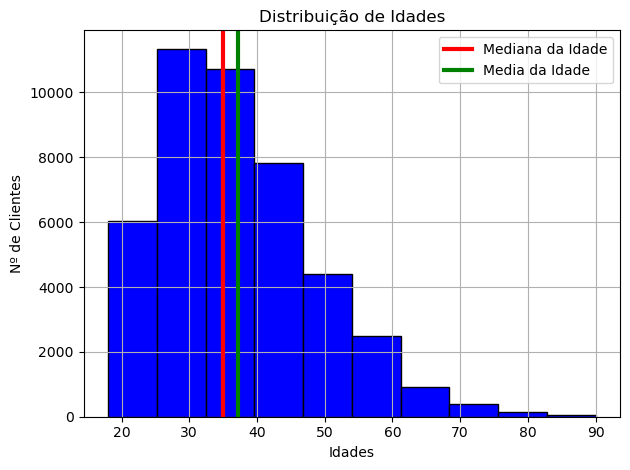

In [38]:
df_sample = pd.read_csv('Sample_DH.csv', sep=';' ,encoding = "ISO-8859-1")
display(df_sample.head(3))

idad_media = df_sample.Idade.mean()
idad_median = df_sample.Idade.median()

plt.hist(df_sample.Idade, color='blue', edgecolor='black')
plt.axvline(idad_median, color='r', label='Mediana da Idade', linewidth = 3)
plt.axvline(idad_media, color = 'green', label = 'Media da Idade', linewidth = 3)
plt.legend()
plt.title('Distribuição de Idades')
plt.xlabel('Idades')
plt.ylabel('Nº de Clientes')
plt.tight_layout()
plt.grid()
plt.show()

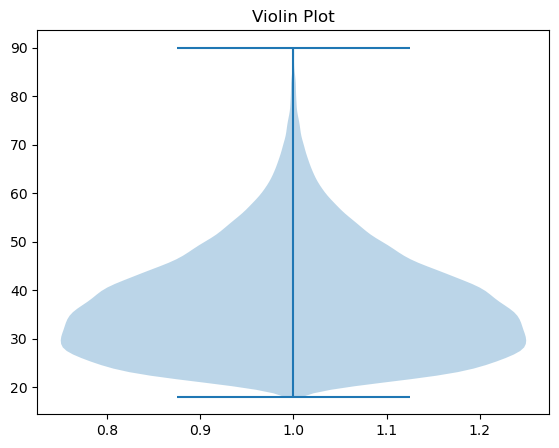

In [24]:
#Outra forma de enxergar a distribuição de idades usando gráfico de violino
data=[df_sample.Idade] #Considerando as idades

fig = plt.figure()

ax = fig.add_axes([0,0,0.8,0.8]) #Definindo um tamanho para os eixos

bp = ax.violinplot(data) #Construindo o gráfico de violino

plt.grid(False) #Desativando os grid
plt.title("Violin Plot") # Colocando título no gráfico
plt.show() #Mostrando a figura

In [25]:
#Base de vendas por ano de uma empresa de varejo
df_vendas = pd.read_csv("sample_DH_Vendas.csv",sep=";",encoding = "Latin-1") 

#Contruindo gráfico de barras com a libraria plotly.graph_objs
fig = go.Figure(
    data=[go.Bar(x=df_vendas.Ano, y=df_vendas.Vendas)]
          )
fig.update_layout(
    title="Vendas por Ano", # Colocando título no gráfico
    xaxis_title="Ano", #Colocando o nome do eixo x
    yaxis_title="Vendas", #Colocando o nome do eixo y
    #Definindo tipo de letra como "Courier New", tamanho de letra 18 na cor preta
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="Black"
    ))
fig.show()

In [26]:
df0 = px.data.gapminder()
df0.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


In [41]:
#Contruindo um gráfico animado mostrando evolução de algumas métricas no tempo
px.scatter(df0, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=50, range_x=[100,100000], range_y=[25,90])